# Precision-Recall-F1score-AUC-ROC

**This notebook is for easy learning about basic classification metrics such as Precision-Recall-F1score-AUC-ROC**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train-cleaned/train_cleaned.csv


In [2]:
df=pd.read_csv('/kaggle/input/train-cleaned/train_cleaned.csv')
df.head()

,Survived,Pclass,Sex,Age,Fare,Family_count,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [3]:
X=df.drop(columns='Survived')
y=df['Survived']
print(X.shape)
print(y.shape)

(891, 6)
(891,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape)
print(y_test.shape)

(712, 6)
(179,)


In [5]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier().fit(X_train, y_train)
y_predict=model.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [6]:
from sklearn.metrics import classification_report
report=classification_report(y_predict, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.81      0.83       113
           1       0.70      0.79      0.74        66

    accuracy                           0.80       179
   macro avg       0.78      0.80      0.79       179
weighted avg       0.81      0.80      0.80       179



In [7]:
from sklearn import metrics
precision, recall, thresholds=metrics.precision_recall_curve(y_test, y_predict)
fpr, tpr, thresholds= metrics.roc_curve(y_test, y_predict)

Area under Precision-Recall Curve: 0.3933354380281754


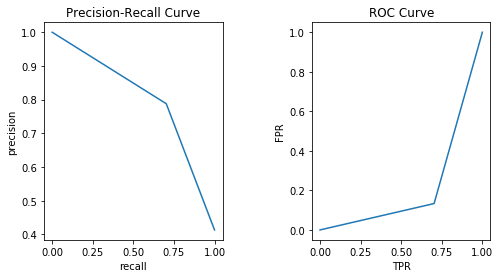

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve')
plt.subplot(122)
plt.plot(tpr,fpr)
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.title('ROC Curve')
plt.subplots_adjust(wspace = 0.5 )
auc=metrics.auc(precision, recall)
print("Area under Precision-Recall Curve:",auc)